In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', category=UserWarning)

from Processing.load_dataset import Load_dataset
from Processing.processing import Split, Valid, Submission
from Valid.validation import rmse

from Model.lightgbm import LightGBM
from Model.xgboost import XGBOOST
from Model.nn import NN
from sklearn.metrics import mean_squared_error

In [2]:
train, test = Load_dataset()

# 提出用
index = np.array(test["id"])

# 加工・処理
train_df = engin(train)
test_df = engin(test)

# val, train, test
X_train, X_test, y_train, y_test, index = Split(train_df)
X_train, X_valid, y_train, y_valid = Valid(X_train, y_train)

## Light-GBM

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11498
[LightGBM] [Info] Number of data points in the train set: 125401, number of used features: 57
[LightGBM] [Info] Start training from score 59.230542
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[200]	Train's rmse: 17.6602	Test's rmse: 20.5382


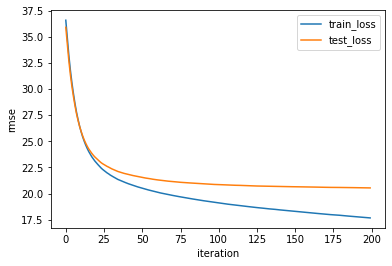

<BarContainer object of 20 artists>

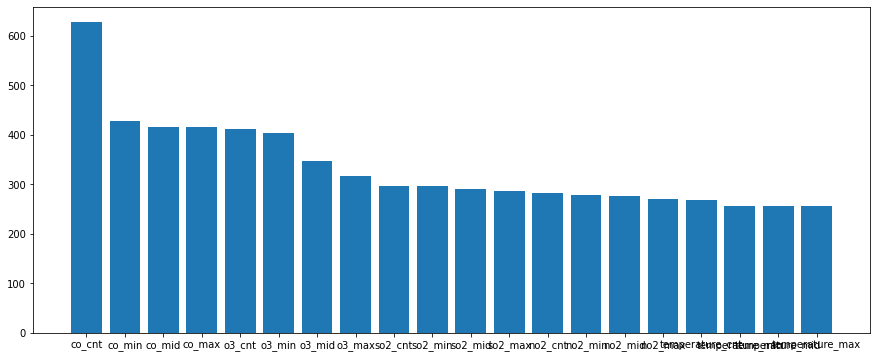

In [3]:
Light_GBM = LightGBM(X_train, X_valid, y_train, y_valid, fig=1)
importance = pd.DataFrame(sorted(Light_GBM.feature_importance(), reverse=True), index=X_test.columns, columns=['importance'])
plt.figure(figsize=(15,6))
plt.bar(X_test.columns[:20], np.ravel(importance.values)[:20])

In [4]:
# 評価
valid_predict = Light_GBM.predict(X_valid)
rmse(valid_predict, y_valid)

test_predict = Light_GBM.predict(X_test)
rmse(test_predict, y_test)

RMSE:  20.53818529755004
RMSE:  20.469423456251338


In [13]:
# 予測
index = test_df["id"]
test_df = test_df.drop(["id"], axis=1)
predict_light_gbm = Light_GBM.predict(data=test_df)

# 提出
Submission(index, predict_light_gbm, name='light_var')

## xgboost

In [15]:
xgboost = XGBOOST(X_train, X_valid, y_train, y_valid, fig=1)

<BarContainer object of 45 artists>

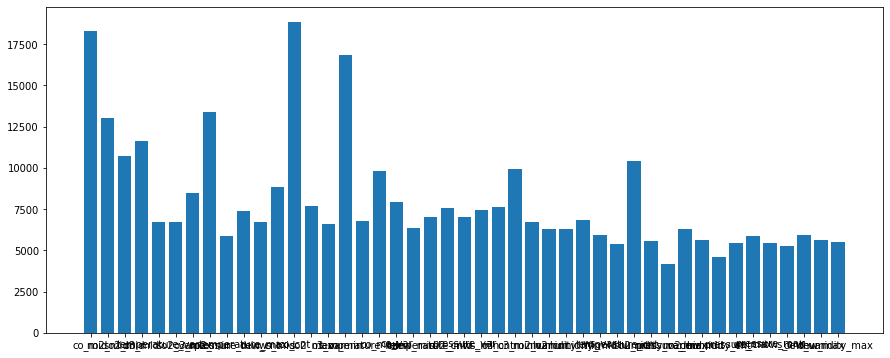

In [26]:
importance = list(xgboost.get_score(importance_type='weight').values())
col = list(xgboost.get_score(importance_type='weight').keys())
plt.figure(figsize=(15,6))
plt.bar(col, importance)

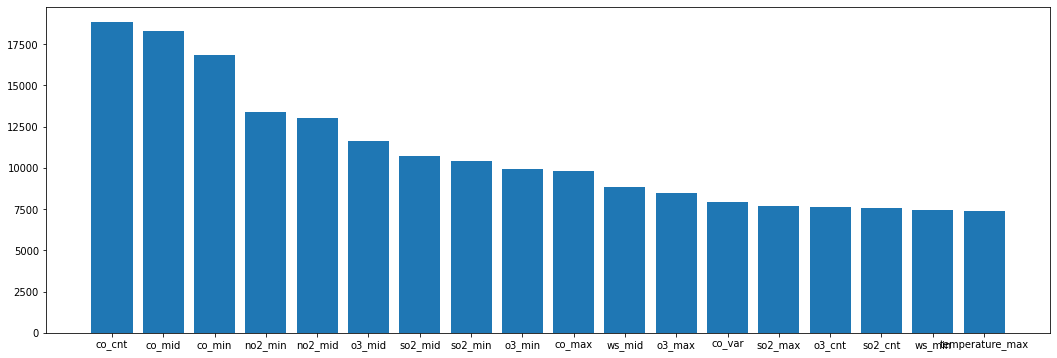

In [57]:
# 最大
im = pd.DataFrame([col,importance], index=["columns", "importance"]).T
im = im.sort_values('importance', ascending=False)
plt.figure(figsize=(18,6))
plt.bar(im["columns"][:18], im["importance"][:18])
plt.show()

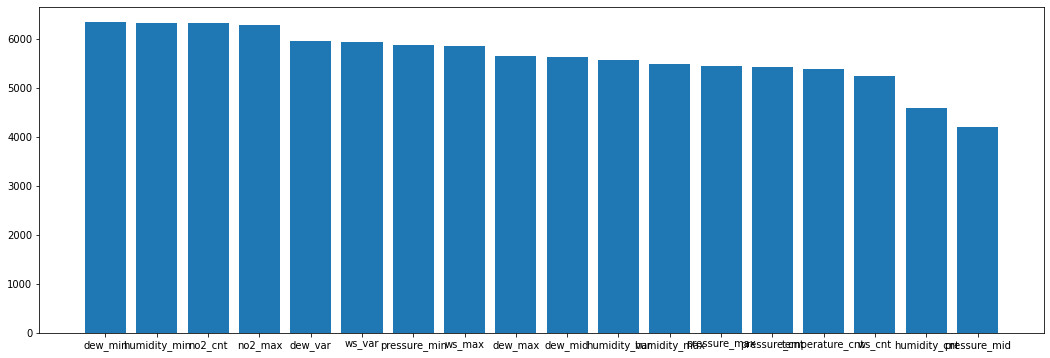

In [58]:
# 最小
im = pd.DataFrame([col,importance], index=["columns", "importance"]).T
im = im.sort_values('importance', ascending=False)
plt.figure(figsize=(18,6))
plt.bar(im["columns"][-18:], im["importance"][-18:])
plt.show()

In [18]:
# 評価
import xgboost as xgb
dm_valid = xgb.DMatrix(X_valid)
valid_predict = xgboost.predict(dm_valid)
rmse(valid_predict, y_valid)

dm_test = xgb.DMatrix(X_test)
test_predict = xgboost.predict(dm_test)
rmse(test_predict, y_test)

RMSE:  20.47883383403503
RMSE:  20.395146661257535


In [19]:
# 予測
test = xgb.DMatrix(test_df)
predict_xgboost = xgboost.predict(test, ntree_limit=xgboost.best_ntree_limit)

Submission(index, predict_xgboost, name='xgb_std')

## var delete

In [5]:
train, test = Load_dataset()

# 提出用
index = np.array(test["id"])

# 加工・処理
train_df = engin(train)
test_df = engin(test)

# val, train, test
X_train, X_test, y_train, y_test, index = Split(train_df)
X_train, X_valid, y_train, y_valid = Valid(X_train, y_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010583 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11498
[LightGBM] [Info] Number of data points in the train set: 125401, number of used features: 57
[LightGBM] [Info] Start training from score 59.230542
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[200]	Train's rmse: 17.6602	Test's rmse: 20.5382


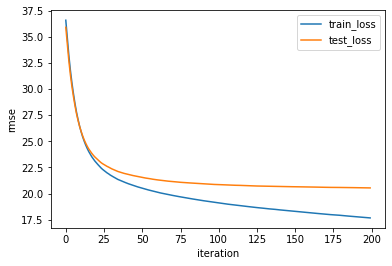

<BarContainer object of 20 artists>

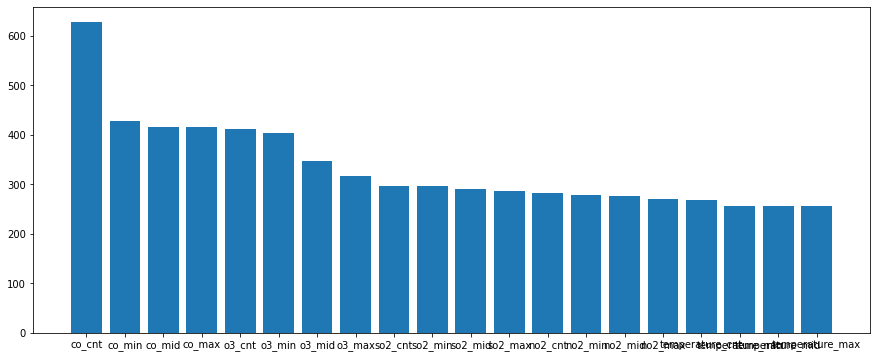

In [6]:
Light_GBM = LightGBM(X_train, X_valid, y_train, y_valid, fig=1)
importance = pd.DataFrame(sorted(Light_GBM.feature_importance(), reverse=True), index=X_test.columns, columns=['importance'])
plt.figure(figsize=(15,6))
plt.bar(X_test.columns[:20], np.ravel(importance.values)[:20])

In [7]:
# 評価
valid_predict = Light_GBM.predict(X_valid)
rmse(valid_predict, y_valid)

test_predict = Light_GBM.predict(X_test)
rmse(test_predict, y_test)

RMSE:  20.53818529755004
RMSE:  20.469423456251338


In [69]:
# 予測
index = test_df["id"]
test_df = test_df.drop(["id"], axis=1)
predict_light_gbm = Light_GBM.predict(data=test_df)

# 提出
Submission(index, predict_light_gbm, name='light_var_delete')

In [70]:
xgboost = XGBOOST(X_train, X_valid, y_train, y_valid, fig=1)

In [71]:
# 評価
import xgboost as xgb
dm_valid = xgb.DMatrix(X_valid)
valid_predict = xgboost.predict(dm_valid)
rmse(valid_predict, y_valid)

dm_test = xgb.DMatrix(X_test)
test_predict = xgboost.predict(dm_test)
rmse(test_predict, y_test)

RMSE:  20.47678497236048
RMSE:  20.395613568179286


In [72]:
# 予測
test = xgb.DMatrix(test_df)
predict_xgboost = xgboost.predict(test, ntree_limit=xgboost.best_ntree_limit)

Submission(index, predict_xgboost, name='xgb_var_delete')

In [8]:
from Engineering.var_delete import engin
train, test = Load_dataset()

# 提出用
index = np.array(test["id"])

# 加工・処理
train_df = engin(train)
test_df = engin(test)

# val, train, test
X_train, X_test, y_train, y_test, index = Split(train_df)
X_train, X_valid, y_train, y_valid = Valid(X_train, y_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11498
[LightGBM] [Info] Number of data points in the train set: 125401, number of used features: 57
[LightGBM] [Info] Start training from score 59.230542
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[200]	Train's rmse: 17.6602	Test's rmse: 20.5382


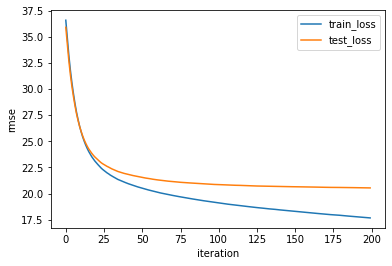

<BarContainer object of 20 artists>

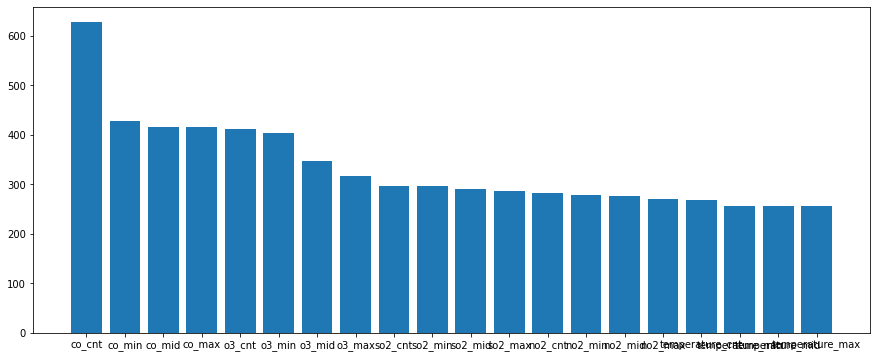

In [9]:
Light_GBM = LightGBM(X_train, X_valid, y_train, y_valid, fig=1)
importance = pd.DataFrame(sorted(Light_GBM.feature_importance(), reverse=True), index=X_test.columns, columns=['importance'])
plt.figure(figsize=(15,6))
plt.bar(X_test.columns[:20], np.ravel(importance.values)[:20])

In [10]:
# 評価
valid_predict = Light_GBM.predict(X_valid)
rmse(valid_predict, y_valid)

test_predict = Light_GBM.predict(X_test)
rmse(test_predict, y_test)

RMSE:  20.53818529755004
RMSE:  20.469423456251338


In [9]:
# 予測
index = test_df["id"]
test_df = test_df.drop(["id"], axis=1)
predict_light_gbm = Light_GBM.predict(data=test_df)

# 提出
Submission(index, predict_light_gbm, name='light_dummy_month')

## var delete dummy

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11564
[LightGBM] [Info] Number of data points in the train set: 125401, number of used features: 90
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 59.230542
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[200]	Train's rmse: 17.3763	Test's rmse: 20.0876


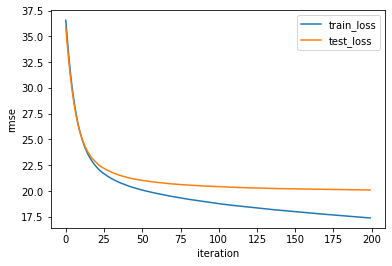

RMSE:  20.087579512658778
RMSE:  19.986129997191256


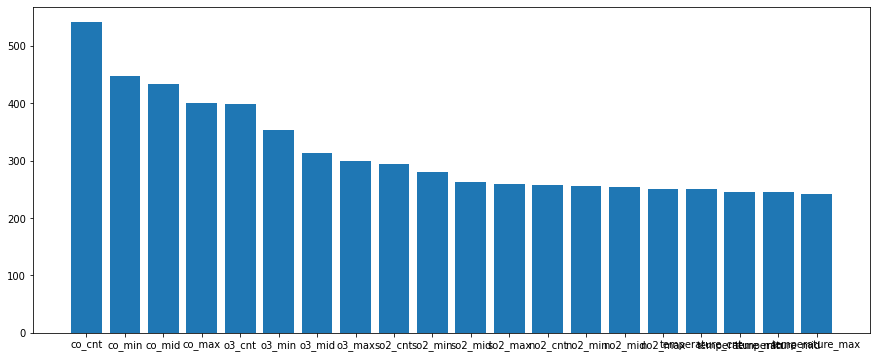

In [11]:
from Engineering.dummy import engin
train, test = Load_dataset()

# 提出用
index = np.array(test["id"])

# 加工・処理
train_df = engin(train)
test_df = engin(test)

# val, train, test
X_train, X_test, y_train, y_test, index = Split(train_df)
X_train, X_valid, y_train, y_valid = Valid(X_train, y_train)

Light_GBM = LightGBM(X_train, X_valid, y_train, y_valid, fig=1)
importance = pd.DataFrame(sorted(Light_GBM.feature_importance(), reverse=True), index=X_test.columns, columns=['importance'])
plt.figure(figsize=(15,6))
plt.bar(X_test.columns[:20], np.ravel(importance.values)[:20])

# 評価
valid_predict = Light_GBM.predict(X_valid)
rmse(valid_predict, y_valid)

test_predict = Light_GBM.predict(X_test)
rmse(test_predict, y_test)

In [12]:
# 予測
index = test_df["id"]
test_df = test_df.drop(["id"], axis=1)
predict_light_gbm = Light_GBM.predict(data=test_df)

# 提出
Submission(index, predict_light_gbm, name='light_dummy')

## 特徴量かさまし

In [12]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [13]:
select = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=123),
                        threshold="median")

In [15]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)

C:\Users\yu886\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\yu886\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [21]:
print(X_train.shape)
print(X_train_l1.shape)

(125401, 90)
(125401, 45)


C:\Users\yu886\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10968
[LightGBM] [Info] Number of data points in the train set: 125401, number of used features: 45
[LightGBM] [Info] Start training from score 59.230542
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[200]	Train's rmse: 17.6192	Test's rmse: 20.4701


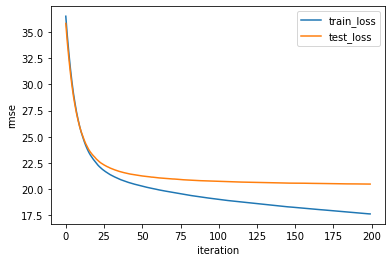

RMSE:  20.470131585140752


C:\Users\yu886\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RMSE:  20.360610099196155


In [17]:
X_valid_l1 = select.transform(X_valid)
Light_GBM = LightGBM(X_train_l1, X_valid_l1, y_train, y_valid, fig=1)

valid_predict = Light_GBM.predict(X_valid_l1)
rmse(valid_predict, y_valid)

X_test_l1 = select.transform(X_test)
test_predict = Light_GBM.predict(X_test_l1)
rmse(test_predict, y_test)

## CV

In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import ShuffleSplit
import lightgbm as lgb
import numpy as np

In [3]:
FOLD = 5
NUM_ROUND = 1000
VERBOSE_EVAL = -1

params = {
    'objective': 'regression',
    'verbose': -1,
}

valid_scores = []
models = []
ss = ShuffleSplit(n_splits=FOLD, test_size=0.25, random_state=42)

In [4]:
train, test = Load_dataset()

from Engineering.dummy import engin
train, test = Load_dataset()

# 提出用
index = np.array(test["id"])

# 加工・処理
train_df = engin(train)
test_df = engin(test)

In [5]:
y = train["pm25_mid"]
X = train.drop(["id", "pm25_mid"], axis=1)
X

,year,month,day,Country,City,lat,lon,co_cnt,co_min,co_mid,...,ws_cnt,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var
0,2019,1,1,Australia,Brisbane,-27.46794,153.02809,38,0.749,2.590,...,42,0.241,1.088,3.101,1.983,17,7.671,10.358,15.112,13.424
1,2019,1,1,Australia,Darwin,-12.46113,130.84185,47,2.594,3.181,...,48,0.828,3.473,7.396,10.411,62,21.324,23.813,24.221,2.021
2,2019,1,1,Australia,Melbourne,-37.81400,144.96332,17,1.190,1.197,...,125,0.000,2.107,8.089,15.719,22,10.309,13.133,15.422,6.355
3,2019,1,1,Australia,Newcastle,-32.92953,151.78010,63,4.586,11.044,...,52,0.284,0.503,3.592,2.485,116,7.146,10.685,13.344,9.417
4,2019,1,1,Australia,Perth,-31.95224,115.86140,47,4.689,8.681,...,102,0.500,0.755,3.396,1.937,93,1.091,3.277,12.272,4.109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195936,2021,12,31,United States,Jacksonville,30.33218,-81.65565,12,0.694,0.995,...,22,2.195,2.710,6.125,3.757,12,16.774,22.679,26.058,13.252
195937,2021,12,31,United States,Las Vegas,36.17497,-115.13722,14,0.528,1.256,...,51,1.002,2.974,6.861,8.354,12,10.432,14.741,15.827,7.078
195938,2021,12,31,United States,Milwaukee,43.03890,-87.90647,171,1.975,6.627,...,125,0.994,1.087,2.578,0.612,26,2.049,3.531,6.686,5.286
195939,2021,12,31,Vietnam,Hanoi,21.02450,105.84117,31,2.613,2.704,...,266,1.005,3.058,6.005,6.085,51,1.922,7.443,7.716,4.642


In [25]:
X

,year,month,day,Country,City,lat,lon,co_cnt,co_min,co_mid,...,ws_cnt,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var
0,2019,1,1,Australia,Brisbane,-27.46794,153.02809,38,0.749,2.590,...,42,0.241,1.088,3.101,1.983,17,7.671,10.358,15.112,13.424
1,2019,1,1,Australia,Darwin,-12.46113,130.84185,47,2.594,3.181,...,48,0.828,3.473,7.396,10.411,62,21.324,23.813,24.221,2.021
2,2019,1,1,Australia,Melbourne,-37.81400,144.96332,17,1.190,1.197,...,125,0.000,2.107,8.089,15.719,22,10.309,13.133,15.422,6.355
3,2019,1,1,Australia,Newcastle,-32.92953,151.78010,63,4.586,11.044,...,52,0.284,0.503,3.592,2.485,116,7.146,10.685,13.344,9.417
4,2019,1,1,Australia,Perth,-31.95224,115.86140,47,4.689,8.681,...,102,0.500,0.755,3.396,1.937,93,1.091,3.277,12.272,4.109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195936,2021,12,31,United States,Jacksonville,30.33218,-81.65565,12,0.694,0.995,...,22,2.195,2.710,6.125,3.757,12,16.774,22.679,26.058,13.252
195937,2021,12,31,United States,Las Vegas,36.17497,-115.13722,14,0.528,1.256,...,51,1.002,2.974,6.861,8.354,12,10.432,14.741,15.827,7.078
195938,2021,12,31,United States,Milwaukee,43.03890,-87.90647,171,1.975,6.627,...,125,0.994,1.087,2.578,0.612,26,2.049,3.531,6.686,5.286
195939,2021,12,31,Vietnam,Hanoi,21.02450,105.84117,31,2.613,2.704,...,266,1.005,3.058,6.005,6.085,51,1.922,7.443,7.716,4.642


In [ ]:
for fold, (train_indices, valid_indices) in enumerate(ss.split(X)):
    print(train_indices)
    X_train, X_valid = X[train_indices], X[valid_indices]
    y_train, y_valid = y[train_indices], y[valid_indices]
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid)

    model = lgb.train(
        params,
        lgb_train,
        valid_sets=lgb_eval,
        num_boost_round=NUM_ROUND,
        verbose_eval=VERBOSE_EVAL
    )

    y_valid_pred = model.predict(X_valid)
    score = mean_absolute_error(y_valid, y_valid_pred)
    print(f'fold {fold} MAE: {score}')
    valid_scores.append(score)

    models.append(model)

cv_score = np.mean(valid_scores)
print(f'CV score: {cv_score}')